# Linear Support Vector Machine Demo

This notebook demonstrates the implementation and usage of our Linear SVM algorithm with gradient descent optimization. We'll compare it with scikit-learn's implementation and visualize the decision boundaries.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC

# Import our implementation
from linear_svm import LinearSVM

## 1. Generate Linearly Separable Dataset

We'll create a linearly separable dataset using `make_blobs`.

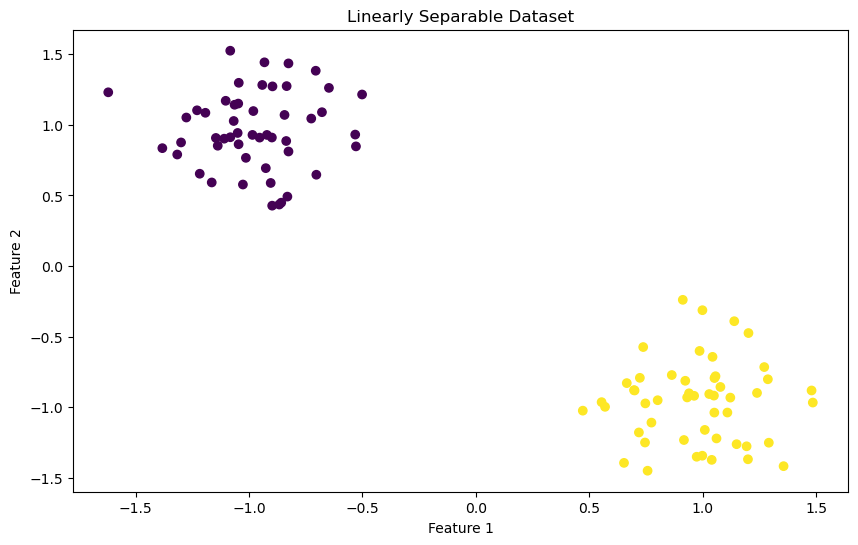

In [47]:
# Generate dataset
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    cluster_std=1.0,
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2. Train Our Linear SVM

In [48]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train our SVM
our_svm = LinearSVM(
    learning_rate=0.001,
    lambda_para=0.01,
    n_iterations=1000
)
our_svm.fit(X_train, y_train)

# Make predictions
our_predictions = our_svm.predict(X_test)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our Linear SVM Accuracy: {our_accuracy:.4f}")

Our Linear SVM Accuracy: 0.4500


## 3. Compare with scikit-learn Implementation

In [49]:
# Train scikit-learn's Linear SVM
sklearn_svm = LinearSVC(random_state=42)
sklearn_svm.fit(X_train, y_train)

# Make predictions
sklearn_predictions = sklearn_svm.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn Linear SVM Accuracy: {sklearn_accuracy:.4f}")

scikit-learn Linear SVM Accuracy: 1.0000


## 4. Visualize Decision Boundaries

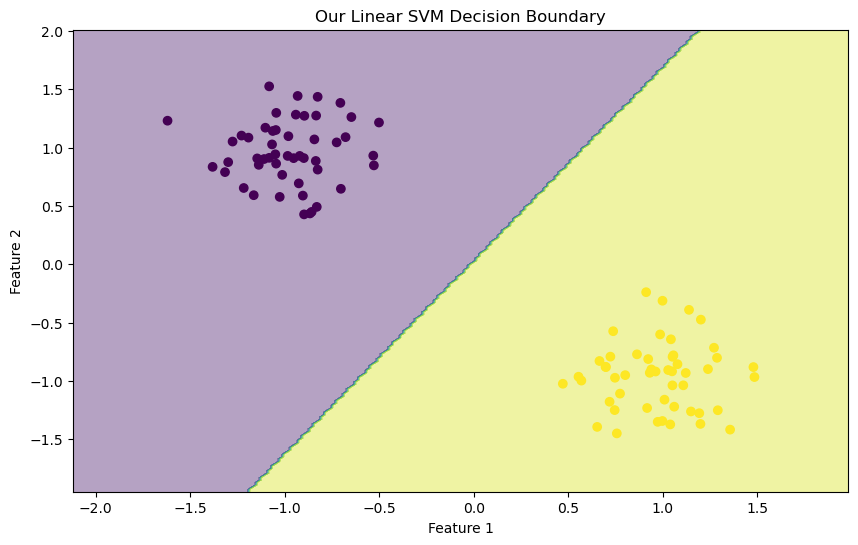

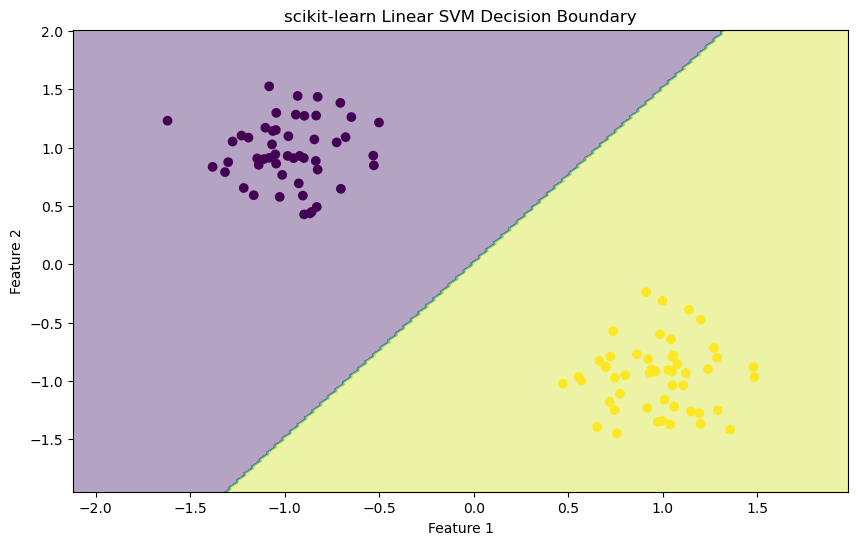

In [50]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for both implementations
plot_decision_boundary(our_svm, X_scaled, y, 'Our Linear SVM Decision Boundary')
plot_decision_boundary(sklearn_svm, X_scaled, y, 'scikit-learn Linear SVM Decision Boundary')

## 5. Effect of Learning Rate

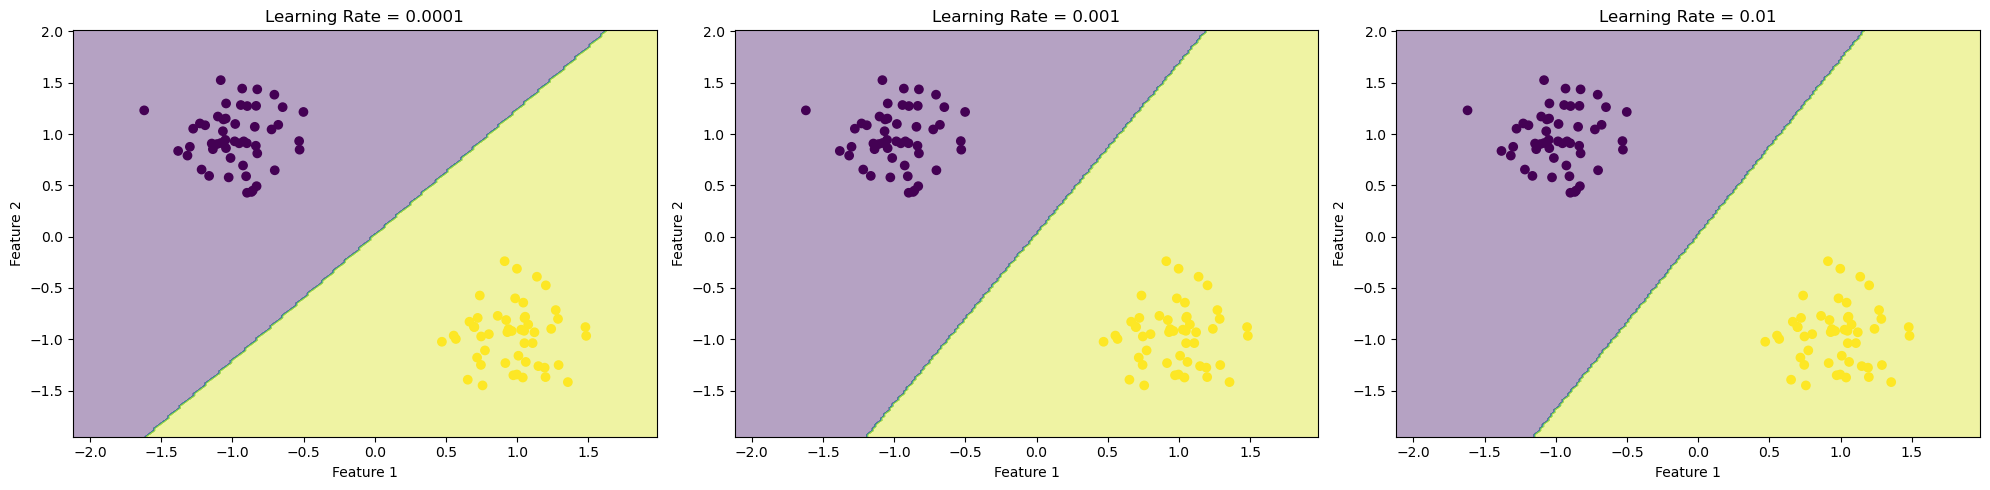

In [51]:
# Train SVMs with different learning rates
learning_rates = [0.0001, 0.001, 0.01]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, lr in enumerate(learning_rates):
    svm = LinearSVM(learning_rate=lr, lambda_para=0.01, n_iterations=1000)
    svm.fit(X_train, y_train)
    
    # Create mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.4)
    axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
    axes[idx].set_title(f'Learning Rate = {lr}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 6. Effect of Regularization Parameter

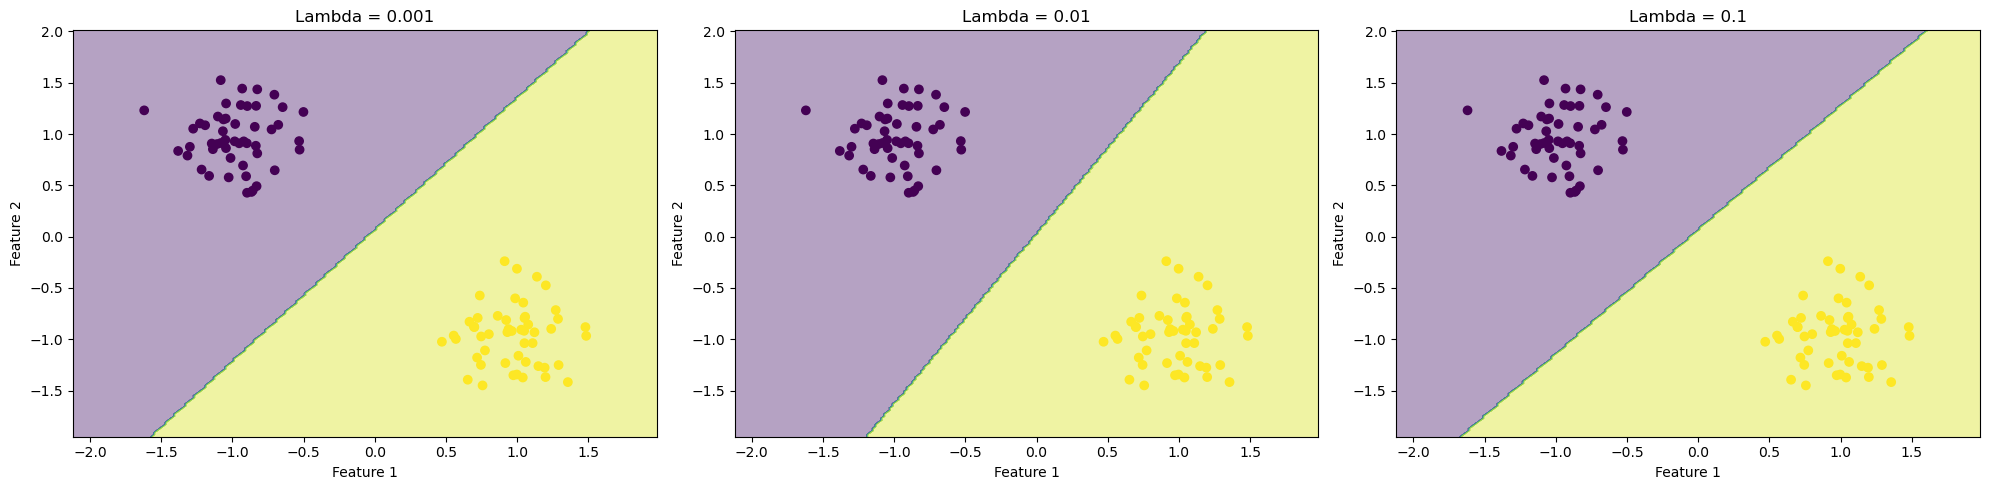

In [52]:
# Train SVMs with different lambda values
lambda_values = [0.001, 0.01, 0.1]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, lambda_val in enumerate(lambda_values):
    svm = LinearSVM(learning_rate=0.001, lambda_para=lambda_val, n_iterations=1000)
    svm.fit(X_train, y_train)
    
    # Create mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.4)
    axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
    axes[idx].set_title(f'Lambda = {lambda_val}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()